# Notebook Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






%matplotlib inline

# Constants

In [2]:
TOKEN_SPAM_PROB_FILE ='/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/03_Testing/prob-spam.txt'
TOKEN_NONSPAM_PROB_FILE ='/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE ='/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/03_Testing/prob-all.txt'

TEST_FEATURE_MATRIX = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/03_Testing/test-features.txt'
TEST_TARGET_MATRIX = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/03_Testing/test-target.txt'

WORD_ID_FILE = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/word-by-id.csv'


VOCAB_SIZE = 2500

# LOAD DATA

In [3]:
#Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter =' ')
# TARGET
y_test = np.loadtxt(TEST_TARGET_MATRIX, delimiter = ' ')
# Token Probs

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = ' ')
prob_token_ham = np.loadtxt(TOKEN_NONSPAM_PROB_FILE, delimiter = ' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = ' ')

# Calculating the Probability

## The Dot Product

In [4]:
a = np.array([1,2,3])
b = np.array([0,4,5])

In [5]:
a.dot(b)

23

In [6]:
X_test.shape

(1724, 2500)

In [7]:
prob_token_spam.shape

(2500,)

In [8]:
print('shape of the dot prod :',  X_test.dot(prob_token_spam).shape)

shape of the dot prod : (1724,)


## Set the Prior

$$P (Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [9]:
PROB_SPAM = 0.3476

In [10]:
log_prob_token_spam =np.log(prob_token_spam)

## Joint Probability in log Format

In [11]:
## MULTIPLY THE PRIOR BY THE TEST "CONSTANT"

joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [12]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

In [13]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

#  Making Predictions

### Cheking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center> **OR** </center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [14]:
prediction = joint_log_spam > joint_log_ham
prediction[-5:]

array([False, False, False, False, False])

In [15]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

DE PROB DO NOT DEPPEND ON THE PROB OF THE TOKEN APPEARING IN THE DATAF

In [16]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

## METRICS

### Accuracy

In [22]:
# SUM ALL THE TRUE VALUES
correct_doc = (y_test == prediction).sum()
wrong_doc = X_test.shape[0] - correct_doc
print(f'corrent docs: {correct_doc}')
print(f'incorrent docs: {wrong_doc}')
print(f'% of accuracy : {correct_doc / X_test.shape[0]}')
print(f'% of incorect : {1- (correct_doc/ X_test.shape[0])}')


corrent docs: 1668
incorrent docs: 56
% of accuracy : 0.9675174013921114
% of incorect : 0.0324825986078886


## Visualising the results

In [33]:
yaxis_label = 'P(X|Spam)'
xaxis_label = 'P(X|Nonspam)'

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

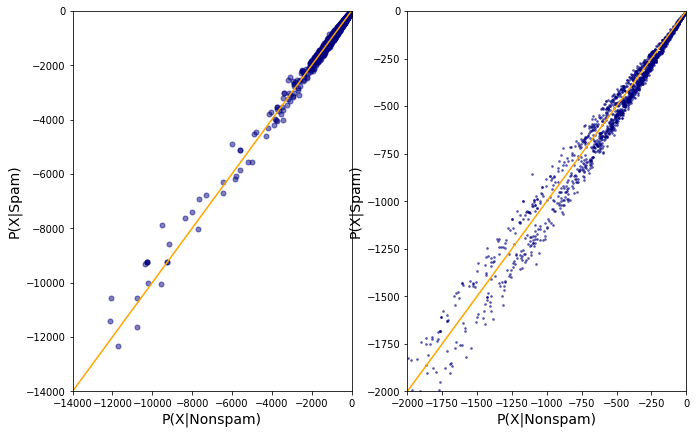

In [41]:
plt.figure(figsize=(11,7))


# Chart nr.1
plt.subplot(1,2,1)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize= 14)

## Set Scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.plot(linedata, linedata, color = 'orange')
plt.scatter(joint_log_ham,joint_log_spam, color = 'navy',alpha= 0.5, s= 25)

# Chart Nr.2
plt.subplot(1,2,2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize= 14)

## Set Scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata, linedata, color = 'orange')
plt.scatter(joint_log_ham,joint_log_spam, color = 'navy',alpha= 0.5, s= 3)


In [44]:
# Chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label:joint_log_spam, xaxis_label:joint_log_ham,
                          labels : y_test})

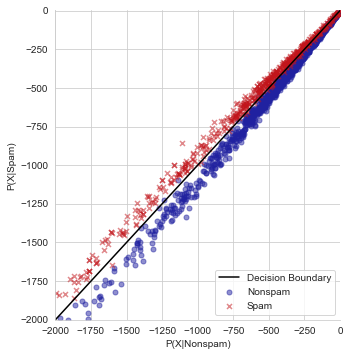

In [69]:
my_colors = ['#2021A0','#C2151B']

sns.lmplot(x= xaxis_label, y = yaxis_label, data = summary_df ,fit_reg= False,
          scatter_kws = {'alpha' : 0.5, 's':25} , hue = labels ,
           markers=['o','x'], palette= my_colors, legend = False )
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.plot(linedata,linedata, color = 'black')

plt.legend(('Decision Boundary','Nonspam', 'Spam'), loc = 'lower right', fontsize = 10)




## False Positives and False Negatives

In [70]:
np.unique(prediction,return_counts=True)

(array([False,  True]), array([1169,  555]))

In [75]:
# bitwise (&) : element by element comparisson
true_pos = (y_test == 1) & (prediction == 1)

544

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
print(confusion_matrix(y_test, prediction))

[[1124   11]
 [  45  544]]


## Recall Score 

True Positives / True Positives + False Negatives

In [88]:
from sklearn.metrics import recall_score

In [91]:
print(round(recall_score(y_test,prediction),3))

0.924


## Precision Score

In [92]:
from sklearn.metrics import precision_score

In [93]:
print(precision_score(y_test,prediction))

0.9801801801801802


## F-Score or F1 Score

F SCORE IS THE METRIC BETWEEN PRECISION AND RECALL

In [94]:
from sklearn.metrics import f1_score

In [95]:
print(f1_score(y_test,prediction))

0.9510489510489509
